In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train: ", x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values



x_train:  (50000, 32, 32, 3)


In [2]:
x_train, x_test = x_train , x_test 
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test, (Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (50000, 3072)
x_test:  (10000, 3072)
y_train:  (50000, 10)
y_test:  (10000, 10)


In [3]:
def sigmoid(z):
    s = 1./(1 + np.exp(-z))
    return s

In [4]:
def calc_accuracy(x,y):
    h = sigmoid( np.matmul(x, w1) + b1 )
    y_pred = np.matmul(h, w2) + b2
    y_pred = np.argmax(y_pred, axis=1)
    Y = np.argmax(y, axis=1)

    m = Y.size
    accuracy = np.sum(y_pred==Y)*100/m
    return accuracy

In [6]:
std=1e-5
H = 200
w1 = std*np.random.randn(Din, H)
b1 = np.zeros((1,H))
w2 = std*np.random.randn(H, K)
b2 = np.zeros((1,K))
print("w1:", w1.shape)
print("w2:", b1.shape)
batch_size = 500
batches = Ntr//batch_size
epochs = 80
lr = 0.015
lr_decay= 0.999
reg = 5e-8
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(epochs):
    for batch_no in range(batches):
        x_batch = x_train[batch_no*batch_size: (batch_no+1)*batch_size,:]
        y_batch = y_train[batch_no*batch_size: (batch_no+1)*batch_size,:]

        indices = np.arange(batch_size)
        rng.shuffle(indices)
        # Forward pass

        X = x_batch[indices]
        Y = y_batch[indices]

        h = sigmoid( np.matmul(X, w1) + b1 )
        y_pred = np.matmul(h, w2) + b2
        dy = y_pred - Y
        loss = (1/batch_size)*np.square(dy).sum() + reg*( np.sum(w1**2) + np.sum(w2**2) )
        loss_history.append(loss)
        
        # Backward pass
        dw2 = (2/batch_size)* np.matmul(h.T, dy) + 2*reg*w2
        db2 = (2/batch_size)* np.sum(dy, axis = 0)

        dh = (2/batch_size)* np.matmul(dy, w2.T)
        dz1 = dh*h*(1-h)
        dw1 = np.matmul(X.T, dz1) + 2*reg*w1
        db1 = np.sum(dz1, axis = 0)

        w1 -= lr*dw1
        b1 -= lr*db1
        w2 -= lr*dw2
        b2 -= lr*db2
        lr = lr_decay*lr

    train_acc_history.append( calc_accuracy(x_train,y_train) )
    val_acc_history.append( calc_accuracy(x_test,y_test) )

    print("t = ",t," ;loss = ",loss_history[-1]," ;Train Acc = ",train_acc_history[-1]," ;Test Acc = ",val_acc_history[-1])


w1: (3072, 200)
w2: (1, 200)
t =  0  ;loss =  0.7931815671275786  ;Train Acc =  38.14  ;Test Acc =  38.02
t =  1  ;loss =  0.7671619160844542  ;Train Acc =  42.004  ;Test Acc =  40.73
t =  2  ;loss =  0.752661729658692  ;Train Acc =  43.98  ;Test Acc =  42.36
t =  3  ;loss =  0.7434295520391657  ;Train Acc =  45.532  ;Test Acc =  43.18
t =  4  ;loss =  0.7309373107425002  ;Train Acc =  47.2  ;Test Acc =  44.07
t =  5  ;loss =  0.7218757601872471  ;Train Acc =  47.926  ;Test Acc =  44.07
t =  6  ;loss =  0.7113937698713905  ;Train Acc =  49.346  ;Test Acc =  44.62
t =  7  ;loss =  0.7019815172130455  ;Train Acc =  50.372  ;Test Acc =  44.78
t =  8  ;loss =  0.6965577890935911  ;Train Acc =  51.298  ;Test Acc =  45.05
t =  9  ;loss =  0.6907030312347928  ;Train Acc =  52.066  ;Test Acc =  45.33
t =  10  ;loss =  0.6831714431644529  ;Train Acc =  52.804  ;Test Acc =  45.54
t =  11  ;loss =  0.6746514872161776  ;Train Acc =  53.624  ;Test Acc =  45.57
t =  12  ;loss =  0.6688564322294654  

In [7]:
print(loss_history[-1])          #Final loss
print(train_acc_history[-1])     #Final Train Accuracy
print(val_acc_history[-1])       #Final Test Accuracy

0.6045191342217973
64.846
46.04


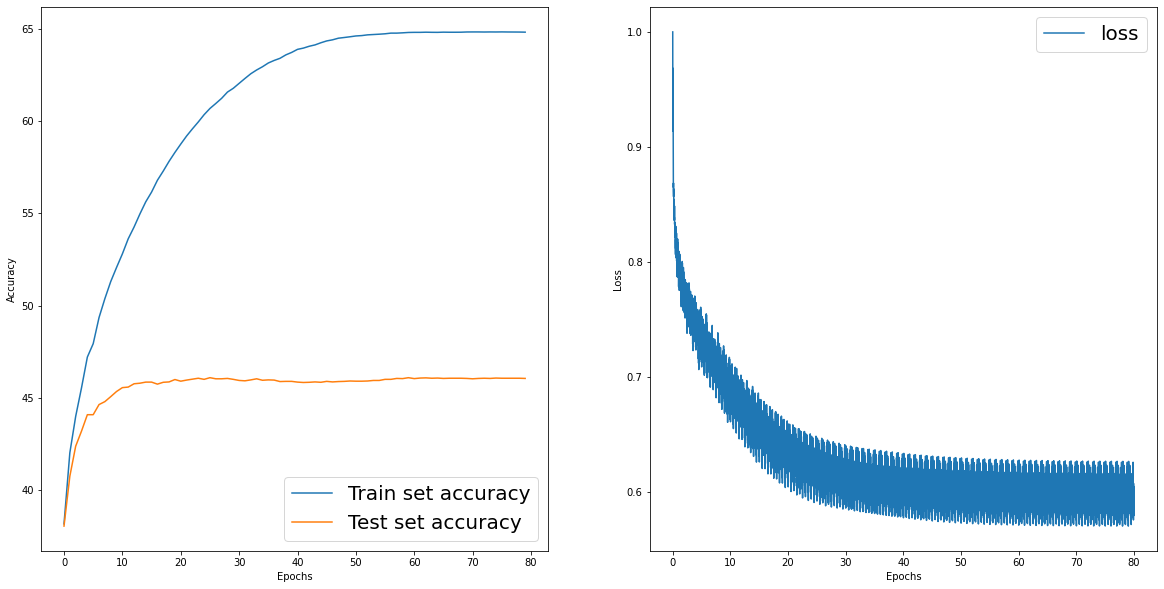

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(train_acc_history, label='Train set accuracy')
ax[0].plot(val_acc_history, label = 'Test set accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right',prop={'size': 20})

epochs = [i/100 for i in range(len(loss_history))]
ax[1].plot(epochs, loss_history, label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right',prop={'size': 20})